### MACS 30100 
### PS4
### Lerong Wang

### 1. Multiple linear regression

### (a)

In [479]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from pylab import rcParams
from sklearn import datasets, neighbors, linear_model
%matplotlib notebook

In [480]:
df = pd.read_csv("Auto.csv", na_values="?")
df= df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### (b)

In [481]:
df = df.drop("name", axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<IPython.core.display.Javascript object>


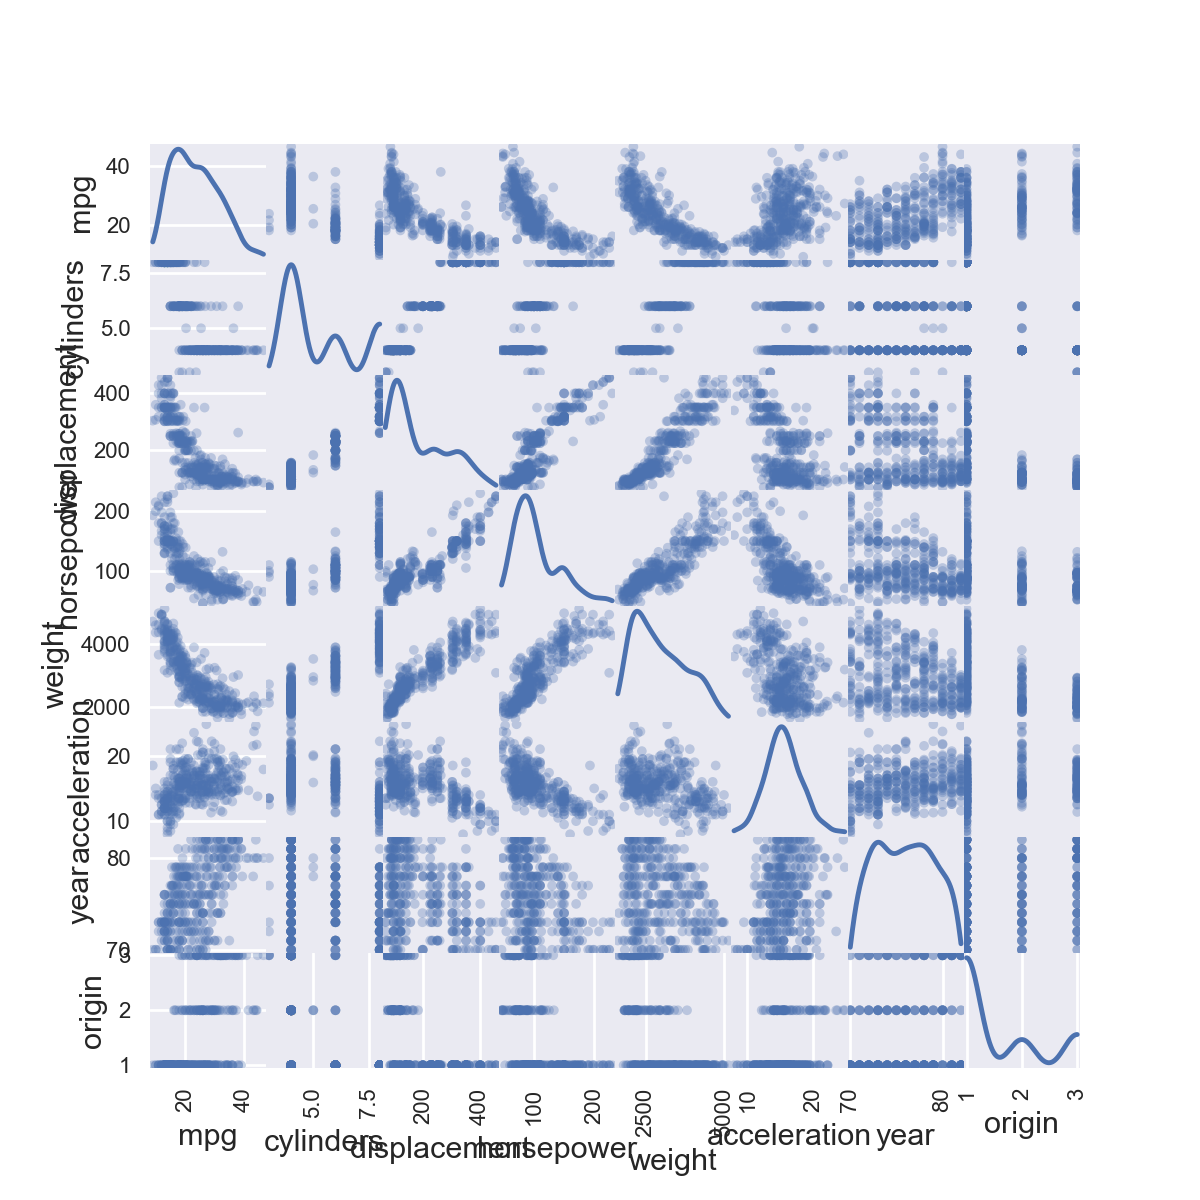

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c5bde6a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c5d6f8438>]], dtype=object)

In [482]:
plt.style.use('seaborn')
scatter_matrix(df, alpha=0.3, figsize=(6, 6), diagonal='kde')

### (c)

In [483]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### (d)

In [484]:
import statsmodels.api as sm
df['constant'] = 1
X = sm.add_constant(df[['constant','cylinders', 'displacement', 'horsepower', 
                        'weight', 'acceleration', 'year', 'origin']])
results = sm.OLS(df.mpg, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        21:04:15   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$\beta_{4}$, $\beta_{6}$, and $\beta_{7}$ (coefficients of weight, year and origin) are statistically signicant at the 1% level

$\beta_{1}$, $\beta_{3}$, and $\beta_{5}$ (coefficients of cylinders, horsepower and acceleration) are not statistically signicant at the 10% level

For every one unit increase in year, the miles per gallon will increase by 0.7508 unit.

### (e)

displacement, horsepower, and weight are the three variables that look most likely to have a nonlinear relationship with mpg

### (i) new multiple regression model

In [485]:
df2 = df
df2['acceleration^2'] = df['acceleration'].apply(lambda x: x*x)
df2['displacement^2'] = df['displacement'].apply(lambda x: x*x)
df2['horsepower^2'] = df['horsepower'].apply(lambda x: x*x)
df2['weight^2'] = df['weight'].apply(lambda x: x*x)
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,constant,acceleration^2,displacement^2,horsepower^2,weight^2
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,144.00,94249.0,16900.0,12278016
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,132.25,122500.0,27225.0,13638249
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,121.00,101124.0,22500.0,11806096
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,144.00,92416.0,22500.0,11785489
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,110.25,91204.0,19600.0,11895601


In [486]:
X = sm.add_constant(df[['constant','cylinders', 'displacement', 'horsepower', 
                        'weight', 'acceleration', 'year', 'origin',
                        'displacement^2', 'horsepower^2', 
                        'weight^2', 'acceleration^2']])
results2 = sm.OLS(df.mpg, X).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        21:04:15   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
constant          20.1084      6.696      3.003      0.003       6.943      33.274
cylinders          0.2519      0.326      0.773      0.440      -0.389       0.893
displacement      -0.0169      0.020     -0.828      0.408      -0.057       0.023
horsepower        -0.1635      0.041     -3.971      0.000      -0.244      -0.083
weight            -0.0136      0.003     -5.069      0.000      -0.019      -0.008
acceleration      -2.0884      0.557     -3.752      0.000      -3.183      -0.994
year               0.7810      0.045     17.512      0.000       0.693       0.869
origin             0.6104      0.263      2.320      0.021       0.093       1.128
displacement^2  2.257e-05   3.61e-05      0.626      0.532   -4.83e-05    9.35e-05
horsepower^2       0.0004      0.000      2.943      0.003       0.000       0.001
weight^2        1.514e-06   3.69e-07      4.105      0.000    7.89e-07    2.24e-06
acceleration^2     0.0576      0.016      3.496      0.001       0.025       0.090
==============================================================================
Omnibus:                       33.614   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.985
Skew:                           0.438   Prob(JB):                     1.16e-17
Kurtosis:                       5.002   Cond. No.                     5.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (ii) Report your adjusted R-squared statistic. Is it better or worse than the adjusted R-squared from part (d)?

adjusted $r^2$ = 0.866 and adjusted $r^2$ in (d) = 0.818, so it's better than the adjusted r-square from (d)

### (iii) What happened to the statistical signicance of the displacement variable coefficient and the coefficient on its squared term?

The statistical significance of displacement decreases, since p-value of displacement increases from 0.008 in (d) to 0.408 and the p-value of displacement^2 is also large and indicate insignificance.

### (iv) What happened to the statistical signicance of the cylinders variable?

Cylinders is also not significant at 10% level and is less significant compare to the result in (d). p-value increases from 0.128 in (d) to 0.44.

### (f)

In [487]:
#6, 200, 100, 3100, 15.1, 1999,1
pred_var = results2.predict([1, 6, 200, 100, 3100, 15.1, 99, 1, 200**2, 
                             100**2, 3100**2, 15.1**2])
print("the predicted mile per gallon is ", pred_var[0])

the predicted mile per gallon is  38.7321110966


### (2)

### (a)

In [488]:
import numpy as np
X2 = np.array([[0, 3, 0], [2, 0, 0], [0, 1, 3], 
              [0, 1, 2], [-1, 0, 1], [1, 1, 1]])

dist_lst = []
for i in range(6):    
    dist_lst.append(((X2[i][0] - 0) ** 2 + (X2[i][1] - 0) ** 2 + (X2[i][2] - 0) ** 2) ** 0.5)
    
print(dist_lst, 
      "the order is from observation 1 to observation 6")

[3.0, 2.0, 3.1622776601683795, 2.2360679774997898, 1.4142135623730951, 1.7320508075688772] the order is from observation 1 to observation 6


### (b)

In [489]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
Y = ["Red", "Red", "Red", "Green", "Green", "Red"]
knn.fit(X2, Y)
result = knn.predict([[0, 0, 0]])
print("The prediction result is ", result[0])

The prediction result is  Green


My KNN prediction with K = 1 is green because the closest point is 1.414 from observation 5, which corresponds to Y=Green

### (c)

In [490]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
Y0 = ["Red", "Red", "Red", "Green", "Green", "Red"]
knn.fit(X2, Y0)
result0 = knn.predict([[0, 0, 0]])
print("The prediction result is ", result0[0])

The prediction result is  Red


My KNN prediction with K = 3 is red because the closest 3 point is 1.414 from observation5, 1.732 from observation6, 2.0 from observation 2. Two of the observation (2.0, 1.732) has Y=Red vs one observation (1.414) with Y=Green, so the KNN prediction for K=3 should be red.

### (d)

We would expect the best value for k to be small. If the Bayes decision boundary in this problem is highly non-linear, then the KNN decision boundary should be less smoother, and allow for larger variance, thus k should be smaller.

### (e)

In [491]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 2)
Y2 = ["Red", "Red", "Red", "Green", "Green", "Red"]
knn.fit(X2, Y2)
result3 = knn.predict([[1, 1, 1]])
print("The prediction result is ", result3[0])

The prediction result is  Green


### (3)

In [492]:
df3 = pd.read_csv("Auto.csv", na_values="?")
df3 = df3.dropna()
df3 = df3.drop("name", axis=1)
df3['mpg_high'] = np.where(df3['mpg']>= np.median(df3['mpg']), 1, 0)
df3['constant'] = 1
df3.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high,constant
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,1


In [493]:
X3 = sm.add_constant(df3[['cylinders', 'displacement', 'horsepower', 
                          'weight', 'acceleration', 'year', 'origin', 'constant']])

logit = sm.Logit(df3["mpg_high"], X3).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        21:04:15   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
constant       -17.1549      5.764     -2.976      0.003     -28.452      -5.858
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

wieght and year are statistically significant at the 5% level.

### (b)

In [494]:
df4 = df3[['cylinders', 'displacement', 'horsepower', 
           'weight', 'acceleration', 'year', 'origin']]
X_train, X_test, y_train, y_test = \
    train_test_split(df4, df3["mpg_high"], test_size = 0.5, random_state=10)

### (c)

In [495]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
print("estimated intersept beta_0: ", LogReg.intercept_[0])

estimated intersept beta_0:  -0.0699494305458


In [496]:
print("coefficients from beta_1 to beta_7: ", LogReg.coef_)

coefficients from beta_1 to beta_7:  [[-0.67090402  0.00591609 -0.03842556 -0.0050224  -0.13904405  0.29914007
  -0.15316485]]


### (d)

In [497]:
y_pred = LogReg.predict(X_test)

In [498]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]])

In [499]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



the predictions for low mpg (mpg high=0) and high mpg (mpg high=1) are quite close, so it's hard to tell which one is better.